# Odesolve Report
----

### This report is to show the meaning of each part of the function and how it work to caclulate the data.

>1 Function euler 

In [1]:
def euler(f, x, t, h):
    return x+f(x,t)*h

>2 Function rk4 

In [2]:
def rk4(f, x, t, h):
    k_1=f(x,t)
    k_2=f(x+k_1*h/2,t+h/2)
    k_3=f(x+k_2*h/2,t+h/2)
    k_4=f(x+k_3*h,t+h)
    return x+(k_1+2*k_2+2*k_3+k_4)*h/6

>3 Function solveto

In [3]:
def solveto(f, x1, t1, t2, hmax, method=euler):
    A=divmod((t2-t1),hmax)
    B=A[0]
    B=int(B)
    C=A[1]
    C=round(C,10)
    N=0
    if t2-t1==0:
        x_2=1
        return x_2
    if method == euler and t2-t1!=0:
     for N in range (N,B):
        N=N+1
        x_2=euler(f,x1,t1,hmax)
        x1=x_2
        t1=t1+hmax
        if C > 0:
            x_2=euler(f,x1,t1,C)
     return x_2
    if method == rk4 and t2-t1!=0:
      for N in range (N,B):
          N=N+1
          x_2 =rk4(f, x1, t1, hmax)
          x1=x_2
          t1=t1+hmax
          if C > 0:
              x_2=rk4(f, x1, t1, C)
    return x_2

In the solveto function, i use the "divmod" to find how many times i need to calculate and i use the "round" to find the last step if there is a remainder.I also make a judge condition if t1=t2 ,then the result will be 1.Then i use a "for in range"loop to iterate the caclulation.At last return all the results.

>4 Function odesolve

In [4]:
def odesolve(f, X0, t, hmax, method=euler):
    import numpy as np
    X0=X0[0]
    t1=np.array(t)
    N=divmod((t[-1]-t[0]),t[1])
    M=N[0]
    M=M+1
    M=int(M)
    i=0
    x_2list=[]
    if method ==euler:
        for i in range (0,M):
            x_2=solveto(f,X0,t1[i],1,hmax,euler)
            i=i+1
            x_2list.insert(0,x_2)
        A=np.array(x_2list)
        B=np.mat(A)
        return B    
    if method ==rk4:
        for i in range (0,M):
            x_2=solveto(f,X0,t1[i],1,hmax,rk4)
            i=i+1
            x_2list.insert(0,x_2)
        A=np.array(x_2list)
        B=np.mat(A)
        return B

In the odesolve function,i use "np.array" to make the input x1 into a list and then i use the "divomd" to find the steps.I make a judge condition to decide using euler method or rk4 method.I make an empty list to save the putput and then transpose it into an array and then transpose it into a matrix.I use "for in "loop to iterate the caclulation.At last return all the results.

>5 Plot of two results

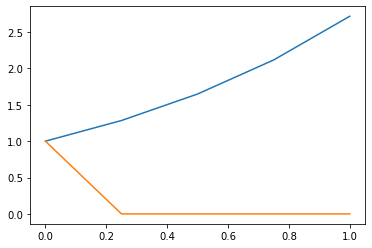

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def f(x,t):
    return x
x0=[1]
y0=[0]
tvals=np.linspace(0,1,5)
x_2=odesolve(f,x0,tvals,0.001,euler)
y_2=odesolve(f,y0,tvals,0.001,rk4)
plt.plot(tvals,x_2.T)
plt.plot(tvals,y_2.T)
plt.show()


In this function i need to plot the two results in one image.I import the plot modules as plt and use the initial conditions which is in the assignment file "x" for 1 and y for "0".Then i use the "np.linspace" to caclulate the time to plot the result and also the initial numerical value is from the test.odesolve file .At last i use ".T" to transpose the array and plot the final image.

>6 Plot of the error

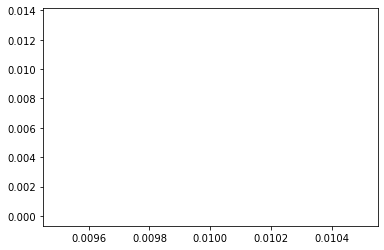

In [6]:
import matplotlib.pyplot as plt
import math

x_1=math.exp(1)
h=0.01
x_2_euler=solveto(f,1,0,1,h,euler)
x_2_rk4=solveto(f,1,0,1,h,rk4)
A=x_2_euler
B=x_2_rk4
Error_euler=x_1-A
Error_rk4=x_1-B
plt.plot(h,Error_euler)
plt.plot(h,Error_rk4)

plt.show()

In this function i need to calculate the error between the true solution and the results by using euler and rk4 method.I import math module and use "math.exp"to be the true solution e.Then i set the initial conidtion for h is 0.01,then i use the solveto function to caclulate the results.At last i make a subtraction with the true solution e and those two results and plot them.